## **Importing Libraries**

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

This notebook will use libraries that will be imported.

## **Reading Data Set**

Following the import of libraries,  the dataset will also import for use.

In [636]:
drug = pd.read_csv("drug200.csv")


Displaying the first ten rows of the dataset using the head() function.

In [637]:
drug.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


Displaying the last ten rows of the dataset using the tail() function.

In [638]:
drug.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


Info.() function provides information about the DataFrame's columns, including the data type and number of non-null values.

In [639]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


The above results indicate that there are no missing or null values in this dataset

The Range Index indicates that the DataFrame has rows with indexes ranging from 0 to 199.

The Dtype column indicates the data type of each column, with int64 representing integer values, float64 representing floating-point values, and object representing string values. 


## The Initial Examination of Data


In this section will analyze the raw dataset that has been imported.

## Categorical Variables

In [640]:
drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

Levels of blood pressure #BP

In [641]:
drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [642]:
drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [643]:
drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

The results show that DrugY has a higher quantity than the other types of drugs.

## **Numerical Variables**

Describe method only works for numeric columns, and it excludes any rows with missing values. If you want to include non-numeric columns or include missing values, you can pass the appropriate arguments to the describe method.

In [644]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


The describe method of a dataframe computes a summary of the central tendency, dispersion, and shape of the distribution of the data, excluding NaN values.

By default, the describe method returns the following statistics for each column:

count: number of non-missing values

mean: arithmetic mean of the non-missing values

std: standard deviation of the non-missing values

min: minimum value

25th percentile: first quartile, or the value below which 25% of the observations may be found

50th percentile: second quartile, or the value below which 50% of the observations may be found

75th percentile: third quartile, or the value below which 75% of the observations may be found

max: maximum value


**Skewness**

If a distribution is skewed to the left, it means that it has a long tail on the left side (the left tail is longer than the right tail), and the mean is less than the median. If a distribution is skewed to the right, it means that it has a long tail on the right side (the right tail is longer than the left tail), and the mean is greater than the median.

In [645]:
skewAge = drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

#This code calculates the skewness of the age column in the drug dataset.


Age skewness:  0.03030835703000607


In [646]:
# Skewness is a measure of the symmetry of a distribution.

In [647]:
skewNatoK = drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


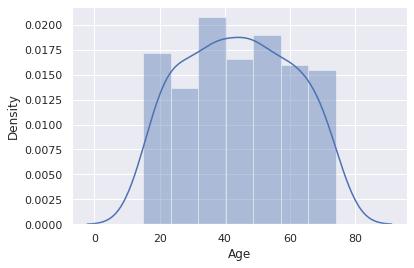

In [648]:
sns.distplot(drug['Age']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


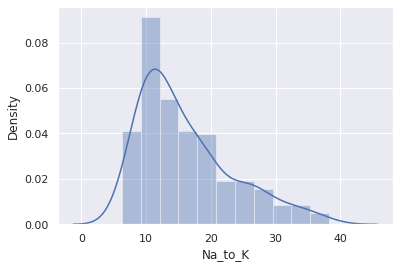

In [649]:
sns.distplot(drug['Na_to_K']);

## **Exploratory Data Analysis (EDA)**

**Gender Distribution**

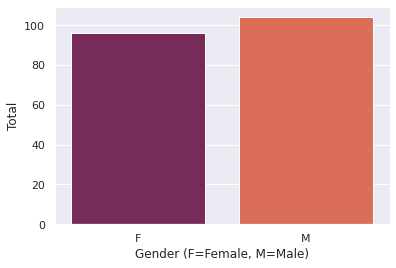

In [650]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

**Blood Pressure Distribution** 

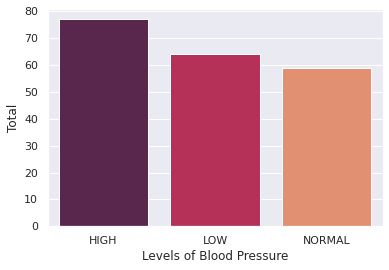

In [651]:
sns.set_theme(style="darkgrid")
sns.countplot(x="BP", data=drug, palette="rocket")
plt.xlabel('Levels of Blood Pressure')
plt.ylabel('Total')
plt.show()

**Cholesterol Distribution**

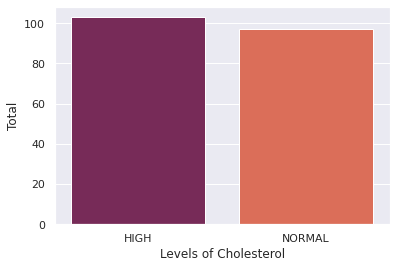

In [652]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=drug, palette="rocket")
plt.xlabel('Levels of Cholesterol')
plt.ylabel('Total')
plt.show()

 **Drug Type Distribution**

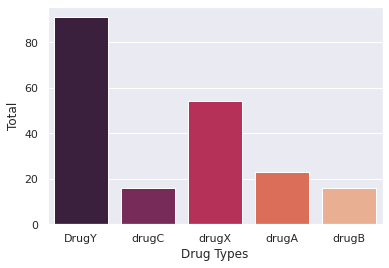

In [653]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Drug", data=drug, palette="rocket")
plt.xlabel('Drug Types')
plt.ylabel('Total')
plt.show()

**Gender Distribution based on Drug Type**

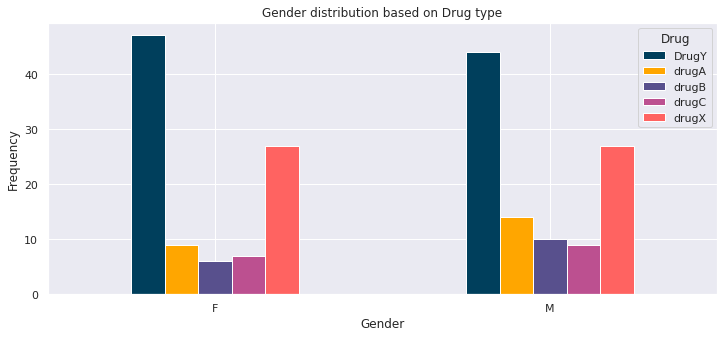

In [654]:
pd.crosstab(drug.Sex,drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Gender Distribution based on Blood Pressure**

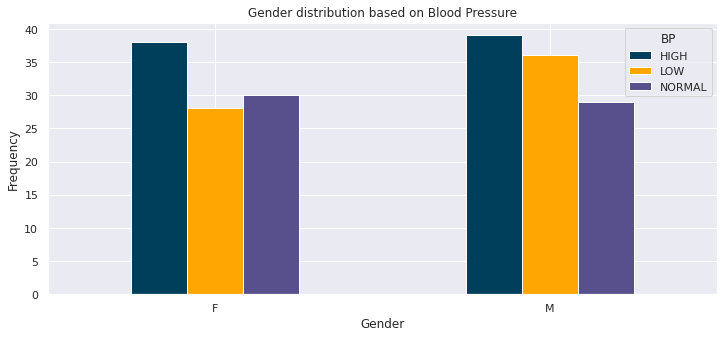

In [655]:
pd.crosstab(drug.Sex,drug.BP).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Blood Pressure')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Blood Pressure distribution based on Cholesterol**

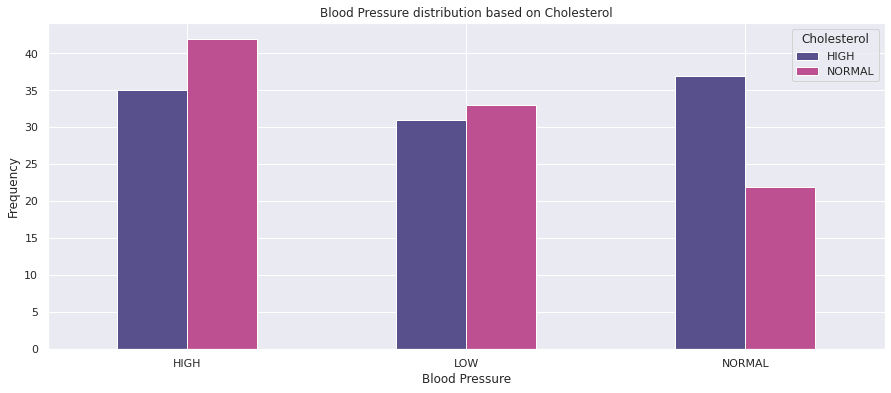

In [656]:
pd.crosstab(drug.BP,drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#58508d','#bc5090'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Sodium to Potassium Distribution based on Gender and Age**

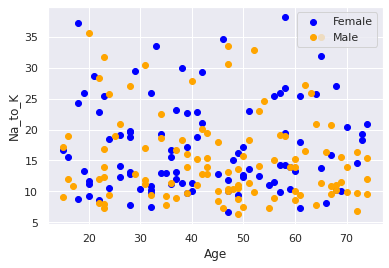

In [657]:
plt.scatter(x=drug.Age[drug.Sex=='F'], y=drug.Na_to_K[(drug.Sex=='F')], c="Blue")
plt.scatter(x=drug.Age[drug.Sex=='M'], y=drug.Na_to_K[(drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

## **Dataset Preparation**

The purpose of this section is to prepare the dataset in order to make it ready for building machine learning models.

**Data Discretization (Data Binning)**

**Age**

The age variable will be divided into seven categories according to age.


*   Below 20
*   20-29
*   30-39
*   40-49
*   50-59
*   60-69
*  Above 70

In [658]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
drug['Age_binned'] = pd.cut(drug['Age'], bins=bin_age, labels=category_age)
drug = drug.drop(['Age'], axis = 1)

**Na_to_K**

The chemical ratio will be split into four categories

In [659]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
drug['Na_to_K_binned'] = pd.cut(drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
drug = drug.drop(['Na_to_K'], axis = 1)

In [660]:
drug

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20




```
# Bu, kod olarak biçimlendirilmiştir
```

**Splitting the dataset**

In [661]:
X = drug.drop(["Drug"], axis=1)
y = drug["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [662]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [663]:
X.head()

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,20s,20-30
1,M,LOW,HIGH,40s,10-20
2,M,LOW,HIGH,40s,10-20
3,F,NORMAL,HIGH,20s,<10
4,F,LOW,HIGH,60s,10-20


In [664]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

## Decision Tree Classifier

In [665]:
from sklearn.tree import DecisionTreeClassifier
dtr= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,max_leaf_nodes=20, random_state = 0)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
dtascore = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dtascore*100))

              precision    recall  f1-score   support

       DrugY       0.83      0.67      0.74        30
       drugA       0.43      0.60      0.50         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.77        60
   macro avg       0.70      0.83      0.75        60
weighted avg       0.79      0.77      0.77        60

[[20  4  1  2  3]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Decision Tree accuracy is: 76.67%


In [666]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [667]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.8824808232702969


### criterion='gini',max_leaf_nodes=40

In [668]:
from sklearn.tree import DecisionTreeClassifier
dtr2= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,max_leaf_nodes=40, random_state = 0)
dtr2.fit(X_train, y_train)
y_pred = dtr2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
dtascore = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dtascore*100))

              precision    recall  f1-score   support

       DrugY       0.86      0.63      0.73        30
       drugA       0.50      1.00      0.67         5
       drugB       0.67      0.67      0.67         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.77        60
   macro avg       0.71      0.84      0.75        60
weighted avg       0.80      0.77      0.77        60

[[19  5  1  2  3]
 [ 0  5  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Decision Tree accuracy is: 76.67%


In [669]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.8873293081187817


### criterion='entropy'max_leaf_nodes=40

In [670]:
from sklearn.tree import DecisionTreeClassifier
dtr3= DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2,max_leaf_nodes=40, random_state = 0)
dtr3.fit(X_train, y_train)

y_pred = dtr3.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
dtascore = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dtascore*100))

              precision    recall  f1-score   support

       DrugY       0.95      0.67      0.78        30
       drugA       0.56      1.00      0.71         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.82        60
   macro avg       0.75      0.92      0.81        60
weighted avg       0.86      0.82      0.82        60

[[20  4  1  2  3]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Decision Tree accuracy is: 81.67%


In [671]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.9380363788258524


### criterion='entropy', splitter='random', max_leaf_nodes=40

In [672]:
from sklearn.tree import DecisionTreeClassifier
dtr4= DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2,max_leaf_nodes=40, random_state = 0)
dtr4.fit(X_train, y_train)

y_pred = dtr4.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
dtascore = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dtascore*100))

              precision    recall  f1-score   support

       DrugY       0.91      0.70      0.79        30
       drugA       0.57      0.80      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.82        60
   macro avg       0.75      0.89      0.80        60
weighted avg       0.84      0.82      0.82        60

[[21  3  1  2  3]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Decision Tree accuracy is: 81.67%


In [673]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.9198545606440343


### criterion='gini', splitter='random', max_leaf_nodes=40

In [674]:
from sklearn.tree import DecisionTreeClassifier
dtr5= DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2,max_leaf_nodes=40, random_state = 0)
dtr5.fit(X_train, y_train)

y_pred = dtr5.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
dtascore = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dtascore*100))

              precision    recall  f1-score   support

       DrugY       0.90      0.63      0.75        30
       drugA       0.50      1.00      0.67         5
       drugB       0.67      0.67      0.67         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.78        60
   macro avg       0.72      0.85      0.75        60
weighted avg       0.83      0.78      0.78        60

[[19  5  1  2  3]
 [ 0  5  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Decision Tree accuracy is: 78.33%


In [675]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.8962181970076706


## Random Forest Classifier

In [676]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_leaf_nodes=30, random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rfcas = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(rfcas*100))

              precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

[[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


In [677]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.9281806789701527


### n_estimators=100, criterion='entropy'

In [678]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_leaf_nodes=30, random_state=0)
rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rfcas = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(rfcas*100))

              precision    recall  f1-score   support

       DrugY       0.92      0.73      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.85      0.83      0.83        60

[[22  2  1  2  3]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Random Forest accuracy is: 83.33%


In [679]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.9250060757955495


### n_estimators=80, criterion='entropy'

In [680]:
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier(n_estimators=80, criterion='entropy', max_leaf_nodes=30, random_state=0)
rfc3.fit(X_train, y_train)

y_pred = rfc3.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rfcas = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(rfcas*100))

              precision    recall  f1-score   support

       DrugY       0.92      0.73      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.85      0.83      0.83        60

[[22  2  1  2  3]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Random Forest accuracy is: 83.33%


In [681]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.9250060757955495


n_estimators=80, criterion='gini'

In [684]:
from sklearn.ensemble import RandomForestClassifier

rfc4 = RandomForestClassifier(n_estimators=80, criterion='gini', max_leaf_nodes=30, random_state=0)
rfc4.fit(X_train, y_train)

y_pred = rfc4.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rfcas = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(rfcas*100))

              precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

[[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


In [686]:
def multiclass_roc_auc_score(y_test, y_pred, average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC AUC Score is: ", multiclass_roc_auc_score(y_test, y_pred))

ROC AUC Score is:  0.9281806789701527
